## Spam detection

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
messages = pd.read_csv('messages.csv',encoding='latin-1')
messages



,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [46]:
print ('0 and 1 counts','\n',messages.label.value_counts())
print ('Shape = >',messages.shape)
print("Here 1 is Spam ")

0 and 1 counts 
 0    2412
1     481
Name: label, dtype: int64
Shape = > (2893, 3)
Here 1 is Spam 


In [48]:
#New column for Length of message
messages['length'] = messages.message.str.len()
messages.head(5)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [49]:
#New column for Length of message
messages['length'] = messages.message.str.len()
messages

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
...,...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1,262
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1,2163
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0,1039
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0,2949


In [50]:
# Convert all messages to lower case
messages['message'] = messages['message'].str.lower()
messages['subject'] = messages['subject'].str.lower()

In [51]:
messages.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [52]:
# Replace email addresses with 'email'
messages['message'] = messages['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
messages['message'] = messages['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
messages['message'] = messages['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
messages['message'] = messages['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
messages['message'] = messages['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [53]:
# Remove punctuation
messages['message'] = messages['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
messages['message'] = messages['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
messages['message'] = messages['message'].str.replace(r'^\s+|\s+?$', '')

In [54]:
messages.head()

,subject,message,label,length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [55]:
#!pip3 install nltk

In [56]:
#nltk.download('stopwords')

In [57]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

messages['message'] = messages['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [58]:
# New column (clean_length) after puncuations,stopwords removal
messages['clean_length'] = messages.message.str.len()
messages.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length numbr apple iss research center...,0,2856,2179
1,NaN,lang classification grimes joseph e barbara f ...,0,1800,1454
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629


In [59]:
# Total length removal
print ('Origian Length', messages.length.sum())
print ('Clean Length', messages.clean_length.sum())

Origian Length 9344743
Clean Length 6767857


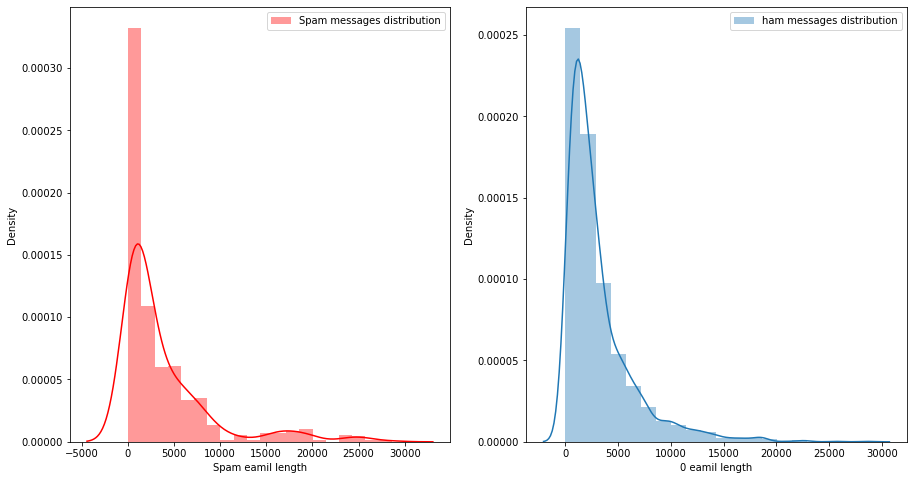

In [60]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(messages[messages['label']==1]['length'],bins=20,ax=ax[0],label='Spam messages distribution',color='r')

ax[0].set_xlabel('Spam eamil length')
ax[0].legend()

sns.distplot(messages[messages['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('0 eamil length')
ax[1].legend()

plt.show()

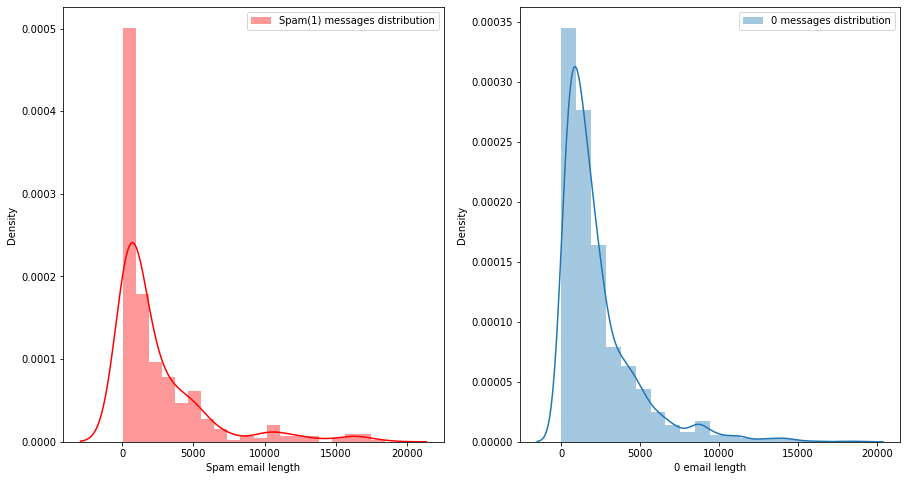

In [61]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(messages[messages['label']==1]['clean_length'],bins=20,ax=ax[0],label='Spam(1) messages distribution',color='r')
ax[0].set_xlabel('Spam email length')
ax[0].legend()

sns.distplot(messages[messages['label']==0]['clean_length'],bins=20,ax=ax[1],label='0 messages distribution')
ax[1].set_xlabel('0 email length')
ax[1].legend()

plt.show()

In [62]:
#Getting sense of loud words in spam 
#!pip install wordcloud
import wordcloud
from wordcloud import WordCloud

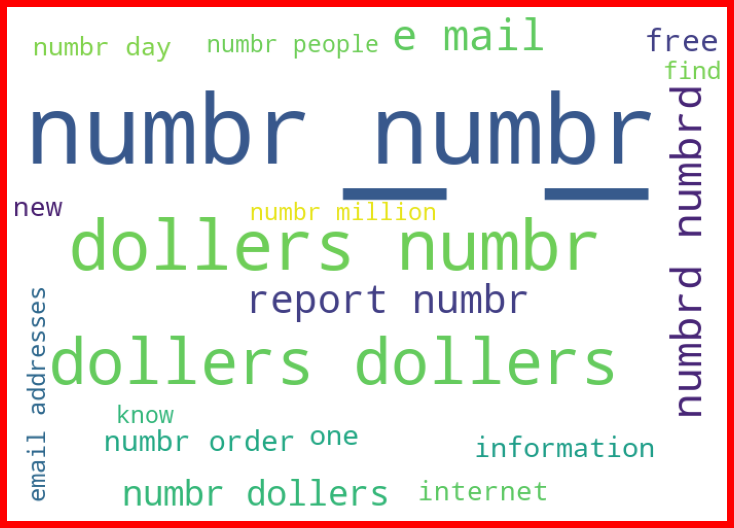

In [63]:
spams = messages['message'][messages['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

We can clearly see, some of the words like "free, dollar,number etc" are indication of spams.

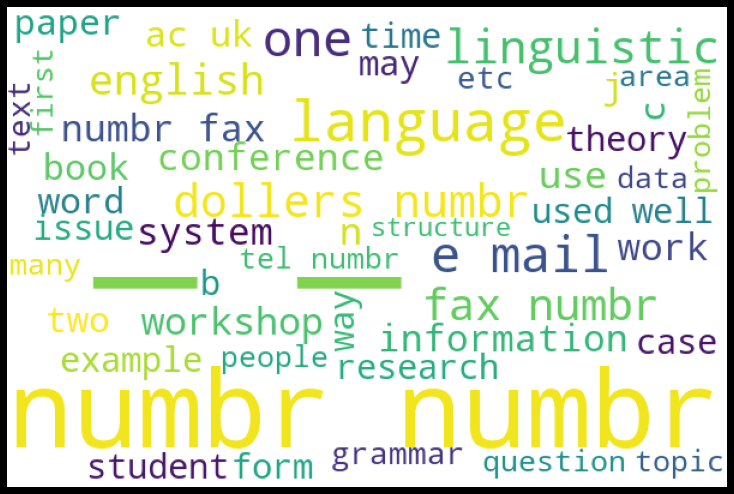

In [64]:
#Getting sense of loud words in ham 

hams = messages['message'][messages['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer()                                       #  Convert text into vectors using TF-IDF



naive = MultinomialNB()                                                        #  Instantiate MultinomialNB classifier

features = tf_vec.fit_transform(messages['message'])            #  Split feature and label


X = features
y = messages['label']

In [76]:
# Spliting for Train and predict data
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=43)

naive.fit(X_train,Y_train)

y_pred= naive.predict(x_test)

print ('accuracy_score  = > \n', accuracy_score(y_test,y_pred))
print ('confusion_matrix  = > \n', confusion_matrix(y_test,y_pred))
print ('classification_report  = > \n',classification_report(y_test,y_pred))

accuracy_score  = > 
 0.8839779005524862
confusion_matrix  = > 
 [[619   0]
 [ 84  21]]
classification_report  = > 
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       619
           1       1.00      0.20      0.33       105

    accuracy                           0.88       724
   macro avg       0.94      0.60      0.63       724
weighted avg       0.90      0.88      0.85       724



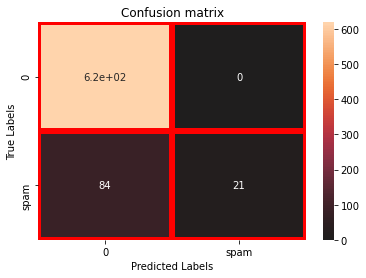

In [77]:
# plot for confusion matrix heatmap
ax=plt.subplot()

sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['0','spam'])
ax.yaxis.set_ticklabels(['0','spam'])
plt.show()